## <center><font face="STCAIYUN" color=LightSeaGreen>作业：自己找一个数据做中位数检验</font>

### 数据描述
内房股，顾名思义，就是内资房地产股，在内地经营且已经上市的房地产公司（的股票），在股票大盘和股评中常常会使用到。
本数据来源于通达信，数据获取日期为2021.8.9，共130行观测值，主要指标有股票代码、企业名称、股票现价、所属细分行业、股票上市日期、H股市值(亿)、总资产(亿)、流通市值(亿)和总市值(亿)，其中股票现价、H股市值、总资产、流通市值和总市值均是连续型数值变量，其余是分类变量。

### 分析方法
符号检验、wilcoxon符号秩检验

### 实验内容
（1）计算出2021年内房股数据中各变量的中位数（均值）

（2）用检验方法检验所得到的中位数是否显著，进而比较不同检验方法的优劣

### 分析过程

In [29]:
library(MASS)
library(readxl)
library(stringr)
data = read_excel('D://nonparametric//各章数据//2021港股内地房地产股票.xlsx')
head(data)

代码,名称,现价,细分行业,上市日期,H股,总资产,流通市值,总市值
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
28,天安,4.470,地产,19870318,14.80,426.21,66.16,66.16
29,达力集团,12.200,地产,19800104,2.38,26.61,29.00,29.00
59,天誉置业,0.890,地产,19931116,84.46,290.62,75.17,75.17
95,绿景中国地产,1.830,地产,20051202,50.98,742.67,93.29,93.29
106,朗诗地产,0.435,地产,19860324,47.22,247.01,20.54,20.54
108,国锐地产,1.010,地产,19730209,31.99,67.02,32.31,32.31



	Exact binomial test

data:  k and n
number of successes = 65, number of trials = 130, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4110838 0.5889162
sample estimates:
probability of success 
                   0.5 



	Wilcoxon signed rank test with continuity correction

data:  data$现价 - 现价.median
V = 5336.5, p-value = 0.01221
alternative hypothesis: true location is not equal to 0


Warning message in ks.test(data$现价, pnorm, mean(data$现价), sd(data$现价)):
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  data$现价
D = 0.25125, p-value = 1.49e-07
alternative hypothesis: two-sided


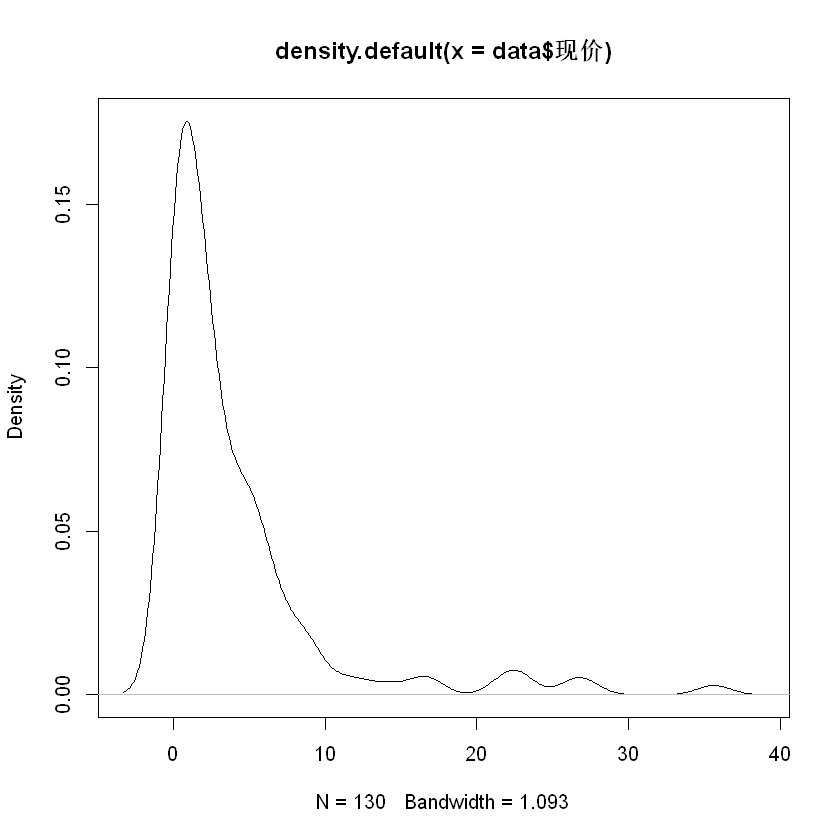

In [2]:
# 以现价为例
attach(data)
现价.median = median(data$现价)
splus = sum(data$现价>现价.median)
sminus = sum(data$现价<现价.median)
k = min(sminus,splus)
n = splus+sminus
binom.test(k,n,0.5) # 符号检验
wilcox.test(data$现价-现价.median) # wilcoxon
plot(density(data$现价))
ks.test(data$现价,pnorm,mean(data$现价),sd(data$现价)) # 正态分布检验

符号检验和wilcoxon检验的p值分别为1和0.01221，所得结果差别很大，同时根据正态分布检验和图表，认为数据也不服从正态分布。

下面用同样的方法处理其他几个变量。


	Exact binomial test

data:  k and n
number of successes = 65, number of trials = 130, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4110838 0.5889162
sample estimates:
probability of success 
                   0.5 


	Wilcoxon signed rank test with continuity correction

data:  dat - x.median
V = 4926, p-value = 0.1206
alternative hypothesis: true location is not equal to 0


	One-sample Kolmogorov-Smirnov test

data:  dat
D = 0.25382, p-value = 1.062e-07
alternative hypothesis: two-sided



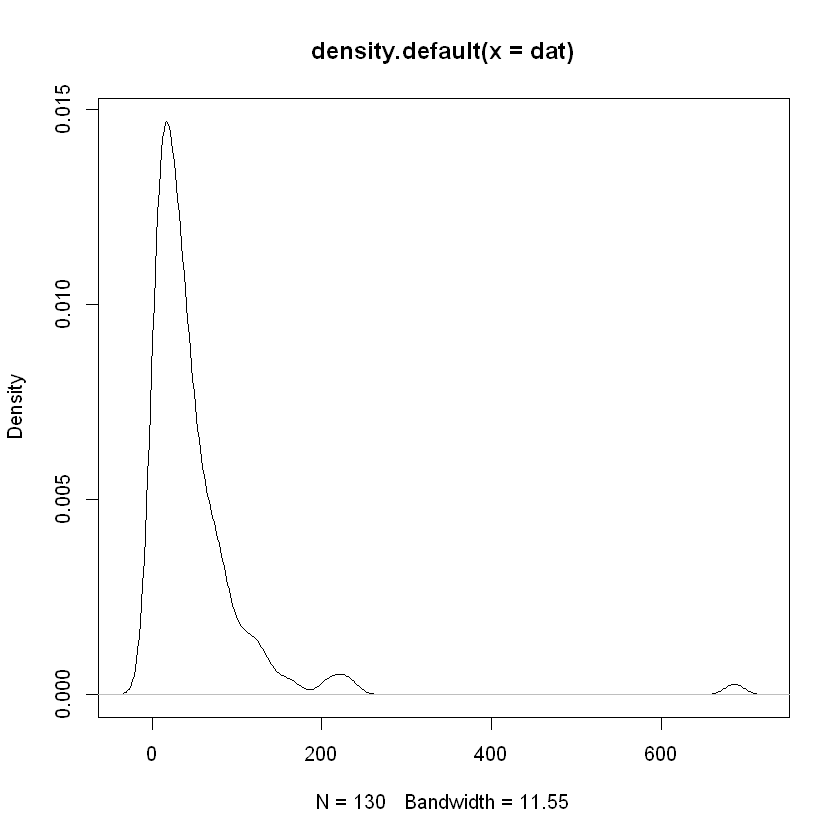

In [69]:
jianyan = function(data,x){

    dat = as.numeric(unlist(data[,x]))
    x.median = median(dat)
    splus = sum(dat>x.median)
    sminus = sum(dat<x.median)
    k = min(sminus,splus)
    n = splus+sminus
    fh = binom.test(k,n,0.5) # 符号检验
    wil = wilcox.test(dat-x.median) # wilcoxon
    plot(density(dat))
    kks = ks.test(dat,pnorm,mean(dat),sd(dat)) # 正态分布检验
    print(fh)
    print(wil)
    print(kks)
}

x1 = "H股"
x2 = "总资产"
x3 = "流通市值"
x4 = "总市值"

jianyan(data,x1) # H股


	Exact binomial test

data:  k and n
number of successes = 65, number of trials = 130, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4110838 0.5889162
sample estimates:
probability of success 
                   0.5 


	Wilcoxon signed rank test with continuity correction

data:  dat - x.median
V = 5406.5, p-value = 0.007613
alternative hypothesis: true location is not equal to 0


	One-sample Kolmogorov-Smirnov test

data:  dat
D = 0.3187, p-value = 6.794e-12
alternative hypothesis: two-sided



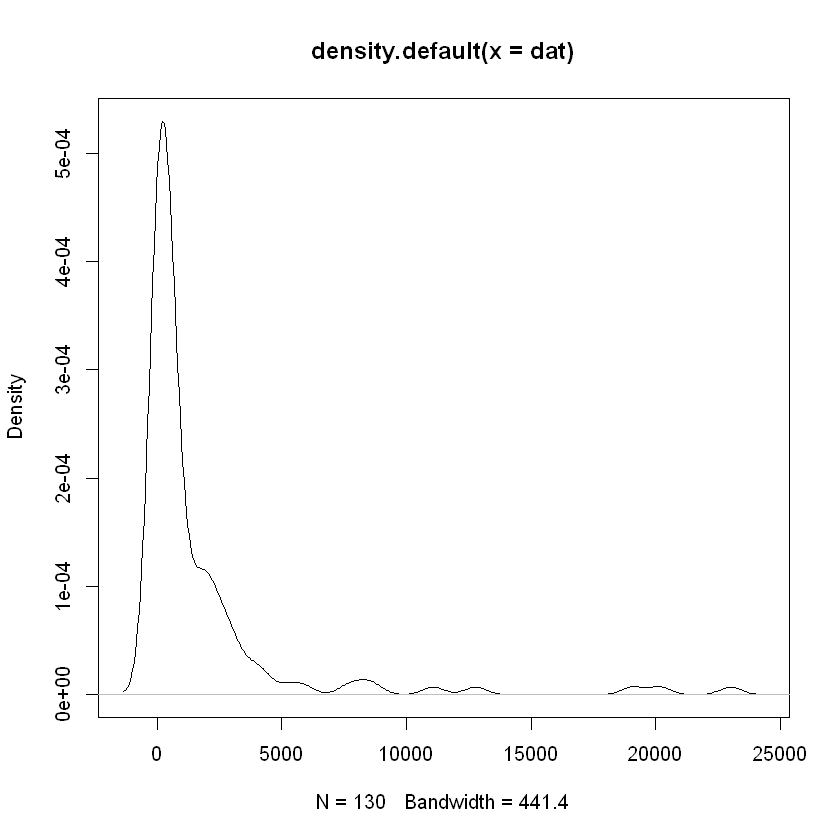

In [70]:
jianyan(data,x2) # 总资产

Warning message in ks.test(dat, pnorm, mean(dat), sd(dat)):
"ties should not be present for the Kolmogorov-Smirnov test"



	Exact binomial test

data:  k and n
number of successes = 65, number of trials = 130, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4110838 0.5889162
sample estimates:
probability of success 
                   0.5 


	Wilcoxon signed rank test with continuity correction

data:  dat - x.median
V = 5428, p-value = 0.006554
alternative hypothesis: true location is not equal to 0


	One-sample Kolmogorov-Smirnov test

data:  dat
D = 0.32917, p-value = 1.165e-12
alternative hypothesis: two-sided



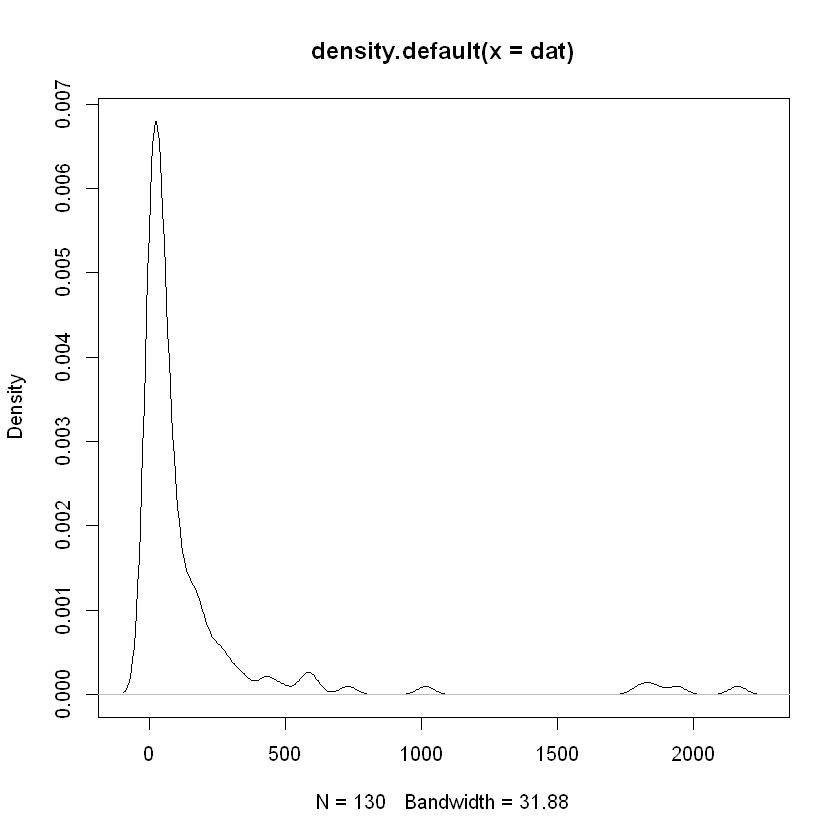

In [71]:
jianyan(data,x3) # 流通市值

Warning message in ks.test(dat, pnorm, mean(dat), sd(dat)):
"ties should not be present for the Kolmogorov-Smirnov test"



	Exact binomial test

data:  k and n
number of successes = 65, number of trials = 130, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4110838 0.5889162
sample estimates:
probability of success 
                   0.5 


	Wilcoxon signed rank test with continuity correction

data:  dat - x.median
V = 5475, p-value = 0.004685
alternative hypothesis: true location is not equal to 0


	One-sample Kolmogorov-Smirnov test

data:  dat
D = 0.33115, p-value = 8.296e-13
alternative hypothesis: two-sided



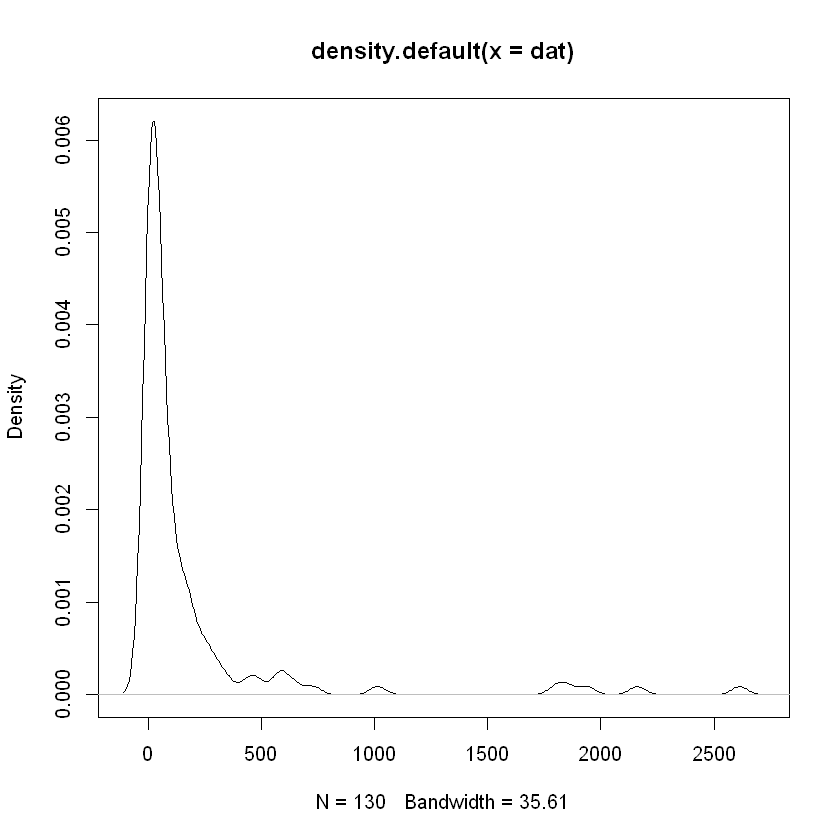

In [72]:
jianyan(data,x4) # 总市值

### 结论
我们发现这五个变量都不服从正态分布，所有变量在符号检验中不显著，在wilcoxon检验中显著，这表明wilcoxon比符号检验利用的信息更多，但是使用wilcoxon的前提是假设总体分布具有对称性，如果对称性不成立，则符号检验的结果更准确。